In [51]:
%pip install llama-index-embeddings-clip

  Using cached llama_index_embeddings_clip-0.2.0-py3-none-any.whl.metadata (810 bytes)
  Using cached torchvision-0.17.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached torch-2.2.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
Using cached llama_index_embeddings_clip-0.2.0-py3-none-any.whl (3.2 kB)
Using cached torchvision-0.17.2-cp311-cp311-win_amd64.whl (1.2 MB)
Using cached torch-2.2.2-cp311-cp311-win_amd64.whl (198.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1
    Uninstalling torch-2.4.1:
      Successfully uninstalled torch-2.4.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1
    Uninstalling torchvision-0.19.1:
      Successfully uninstalled torchvision-0.19.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-vector-stores-qdrant
%pip install llama_index ftfy regex tqdm
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached pypdf-4.3.1-py3-none-any.whl.metadata (7.4 kB)
Using cached pypdf-4.3.1-py3-none-any.whl (295 kB)
  Attempting uninstall: pypdf
    Found existing installation: pypdf 5.0.1
    Uninstalling pypdf-5.0.1:
      Successfully uninstalled pypdf-5.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
embedchain 0.1.123 requires pypdf<6.0.0,>=5.0.0, but you have pypdf 4.3.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 5.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.8 MB 6.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.8 MB 5.9 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.8 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.8 MB 5.1 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.8 MB 5.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/12.8 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 MB 5.5 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Attempting uninstall: qdrant_client
    Found existing installation: qdrant-client 1.12.0
    Uninstalling qdrant-client-1.12.0:
      Successfully uninstalled qdrant-client-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=05f02470c37f8bd11d049028e50665ced07addb2eda3ce597fb529b52e2e8d96
  Stored in directory: c:\users\juanc\appdata\local\pip\cache\wheels\40\b3\0f\a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import requests
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from dotenv import load_dotenv


load_dotenv()

userdata = {
    'OPENAI_API_KEY': os.getenv('OPENAI_API_KEY'),
}

# Set your OpenAI API key


OPENAI_API_KEY = userdata.get('OPENAI_API_KEY') #"your_api_key_here"
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
input_image_path = Path("input_images")
data_path = Path("mixed_wiki")

for path in [input_image_path, data_path]:
    if not path.exists():
        Path.mkdir(path)

print("Environment prepared successfully!")

Environment prepared successfully!


In [26]:
import wget

wget.download('https://drive.usercontent.google.com/download?id=1k87DQvOVJ3HkLcmWs0kOhyyR77RGQHKC&export=download&authuser=0','C:/Users/juanc/Documents/ChuPB/Topicos IA/Finale/input_images/diagram1.png')

'C:/Users/juanc/Documents/ChuPB/Topicos IA/Finale/input_images/diagram1.png'

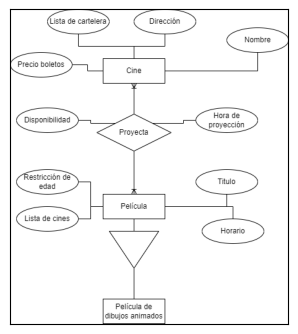

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [28]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt="Generate detailed text description for each image.",
    image_documents=image_documents,
)

print(response_1)

This image is a data flow diagram related to a cinema system, specifically focusing on animated films. Here's a detailed description of each component:

1. **Entities and Data Stores:**
   - **Lista de cartelera:** Represents the list of movies currently showing.
   - **Dirección:** Refers to the address of the cinema.
   - **Nombre:** Indicates the name of the cinema.
   - **Precio boletos:** Represents the ticket prices.
   - **Restricción de edad:** Refers to age restrictions for viewing certain films.
   - **Lista de cines:** Represents a list of cinemas.

2. **Processes:**
   - **Cine:** This process involves the cinema itself, which takes inputs like the movie list, address, name, and ticket prices.
   - **Proyecta:** This decision process involves projecting a film based on availability and showtime.
   - **Película:** This process involves the movie, considering factors like title and schedule.

3. **Data Flows:**
   - Arrows indicate the flow of information between entities, p

In [31]:
def get_wikipedia_images(title):
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "imageinfo",
            "iiprop": "url|dimensions|mime",
            "generator": "images",
            "gimlimit": "50",
        },
    ).json()
    image_urls = []
    for page in response["query"]["pages"].values():
        if page["imageinfo"][0]["url"].endswith((".jpg", ".png")):
            image_urls.append(page["imageinfo"][0]["url"])
    return image_urls

In [39]:

# List of Wikipedia titles to fetch
wiki_titles = {
    "Color theory",
    "Color mixing",
    "Dress code",
    "History of fashion design",
}

In [40]:

# Fetch text and images
import requests  # Ensure you import requests
import urllib
from pathlib import Path

# Set the path to save the text files
data_path = Path("data")
data_path.mkdir(exist_ok=True)  # Create the data directory if it doesn't exist

for title in wiki_titles:
    # Fetch text
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json()
    
    # Get the page content, handle cases where 'extract' might be missing
    page = next(iter(response["query"]["pages"].values()))
    if "extract" in page:
        wiki_text = page["extract"]
        # Save the text to a file
        with open(data_path / f"{title}.txt", "w", encoding="utf-8") as fp:
            fp.write(wiki_text)
        print(f"Saved content for '{title}'")
    else:
        print(f"No extract found for '{title}'")

print("Data collection completed!")


Saved content for 'Color theory'
Saved content for 'Color mixing'
Saved content for 'History of fashion design'
Saved content for 'Dress code'
Data collection completed!


In [42]:
wget.download('https://en.wikipedia.org/wiki/Color_theory','./mixed_wiki/Color theory.html')

'./mixed_wiki/Color theory.html'

In [55]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext
import qdrant_client

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_mm_db3")

text_store = QdrantVectorStore(client=client, collection_name="text_collection")
image_store = QdrantVectorStore(client=client, collection_name="image_collection")

storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

print("Multimodal index built successfully!")

100%|███████████████████████████████████████| 338M/338M [02:47<00:00, 2.11MiB/s]


Multimodal index built successfully!


In [63]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine
from llama_index.core.response.notebook_utils import display_source_node
from PIL import Image
import io

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query based on the image provided.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)


def multimodal_rag_query(query_str, image_path):

    image_str = openai_mm_llm.complete(
    prompt="Generate detailed text description for these images, focus on the clothing.",
    image_documents=SimpleDirectoryReader("./sample_imgs").load_data()
,
)
    
    # Pass both the query and image data to the query engine
    response = query_engine.query( f"{query_str}\n\nImage description: {image_str}")
    
    
    # Display the answer
    print("Answer:", str(response))

    # Display the sources
    print("\nSources:")
    for text_node in response.metadata["text_nodes"]:
        display_source_node(text_node, source_length=200)

    # If images are part of the response metadata, display them
    if response.metadata.get("image_nodes"):
        plt.figure(figsize=(15, 5))
        for i, img_node in enumerate(response.metadata["image_nodes"]):
            img = Image.open(img_node.metadata["file_path"])
            plt.subplot(1, len(response.metadata["image_nodes"]), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
multimodal_rag_query("Tell me if this outfit fits casual business dress code", image_path="./sample_imgs/outfit1.jpg")

Answer: The outfit described does not fit the typical casual business dress code. Casual business attire generally leans towards more neutral and subdued colors, such as navy, gray, or black, and often includes collared shirts, blouses, or sweaters paired with dress pants or skirts. The vibrant red pants and light pink polo shirt in the described outfit are more suited for a casual day out rather than a business setting. Additionally, the cropped pants and slip-on shoes contribute to a more relaxed and informal look, which is not typically appropriate for a business casual dress code.

Sources:


**Node ID:** 9fc8e575-25e6-49b1-8da6-291237ae75a1<br>**Similarity:** 0.7531325247753948<br>**Text:** padding:0"><div style="padding:0 0.25em">
<ul><li><a href="/wiki/Hue" title="Hue">Hue</a>
<ul><li><a href="/wiki/Dichromatism" title="Dichromatism">Dichromatism</a></li></ul></li>
<li><a href="/wik...<br>

**Node ID:** 5fc29017-b04e-4b1d-902d-7d561755496f<br>**Similarity:** 0.7527370414286577<br>**Text:** padding:0"><div style="padding:0 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><th scope="row" class="navbox-group" style="width:1%"><a href="/wiki/Co...<br>